In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_timeseries = pd.read_csv('df_timeseries_en.tsv', sep='\t', parse_dates=['datetime'])
df_videos = pd.read_json('yt_metadata_filtered_"trump ".jsonl', lines=True)

df_trump_entertainment_videos = df_videos[df_videos['categories'] == 'Entertainment']
df_trump_non_entertainment_videos = df_videos[df_videos['categories'] != 'Entertainment']

print(f'the shape of entertainment videos are : {df_trump_entertainment_videos.shape}')
print(f'the shape of non-entertainment videos are : {df_trump_non_entertainment_videos.shape}')

the shape of entertainment videos are : (44392, 13)
the shape of non-entertainment videos are : (403224, 13)


### 分析点赞比例
like_count = (like_count - 0.5*dislike_count) / view_count

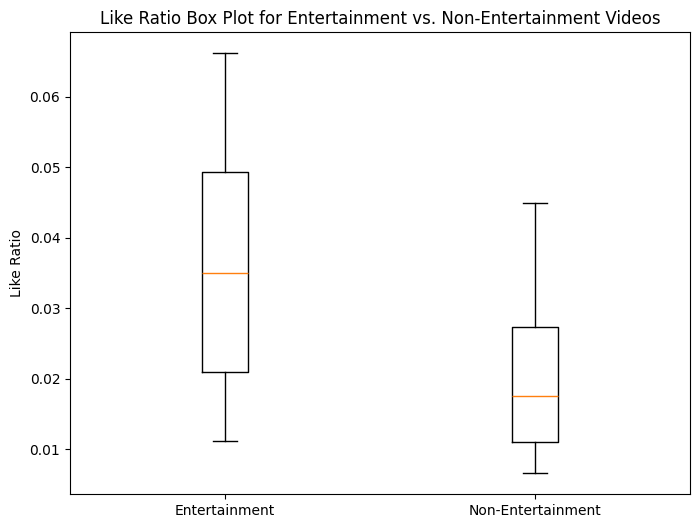

In [3]:
# 比较enterainment和non-enterainment的视频的点赞比例，方法为 (like_count - 0.5*dislike_count)/view_count
# 筛选掉view_count为0的视频
df_trump_entertainment_videos = df_trump_entertainment_videos[df_trump_entertainment_videos['view_count'] > 0]
df_trump_non_entertainment_videos = df_trump_non_entertainment_videos[df_trump_non_entertainment_videos['view_count'] > 0]

pd.options.mode.chained_assignment = None
df_trump_entertainment_videos['like_ratio'] = (df_trump_entertainment_videos['like_count'] - 0.5*df_trump_entertainment_videos['dislike_count']) / df_trump_entertainment_videos['view_count']
df_trump_non_entertainment_videos['like_ratio'] = (df_trump_non_entertainment_videos['like_count'] - 0.5*df_trump_non_entertainment_videos['dislike_count']) / df_trump_non_entertainment_videos['view_count']

# 排序
df_trump_entertainment_videos = df_trump_entertainment_videos.sort_values(by='like_ratio', ascending=False)
df_trump_non_entertainment_videos = df_trump_non_entertainment_videos.sort_values(by='like_ratio', ascending=False)

# 画出boxplox图,为了减少误差，只对25%-75%的数据进行画图

df_trump_entertainment_videos_new = df_trump_entertainment_videos[df_trump_entertainment_videos['like_ratio'] > df_trump_entertainment_videos['like_ratio'].quantile(0.25)]
df_trump_entertainment_videos_new = df_trump_entertainment_videos_new[df_trump_entertainment_videos_new['like_ratio'] < df_trump_entertainment_videos_new['like_ratio'].quantile(0.75)]

df_trump_non_entertainment_videos_new = df_trump_non_entertainment_videos[df_trump_non_entertainment_videos['like_ratio'] > df_trump_non_entertainment_videos['like_ratio'].quantile(0.25)]
df_trump_non_entertainment_videos_new = df_trump_non_entertainment_videos_new[df_trump_non_entertainment_videos_new['like_ratio'] < df_trump_non_entertainment_videos_new['like_ratio'].quantile(0.75)]

plt.figure(figsize=(8, 6))
plt.boxplot([df_trump_entertainment_videos_new['like_ratio'], df_trump_non_entertainment_videos_new['like_ratio']], tick_labels=['Entertainment', 'Non-Entertainment'])
plt.title('Like Ratio Box Plot for Entertainment vs. Non-Entertainment Videos')
plt.ylabel('Like Ratio')
plt.show()

说明了entertainment更容易获得点赞，有更高的点赞率。

### 以频道为单位统计视频数

有一个频道做了关于Trump10000多个视频，把他们按照发布时间排序，然后对view_count的变化进行分析

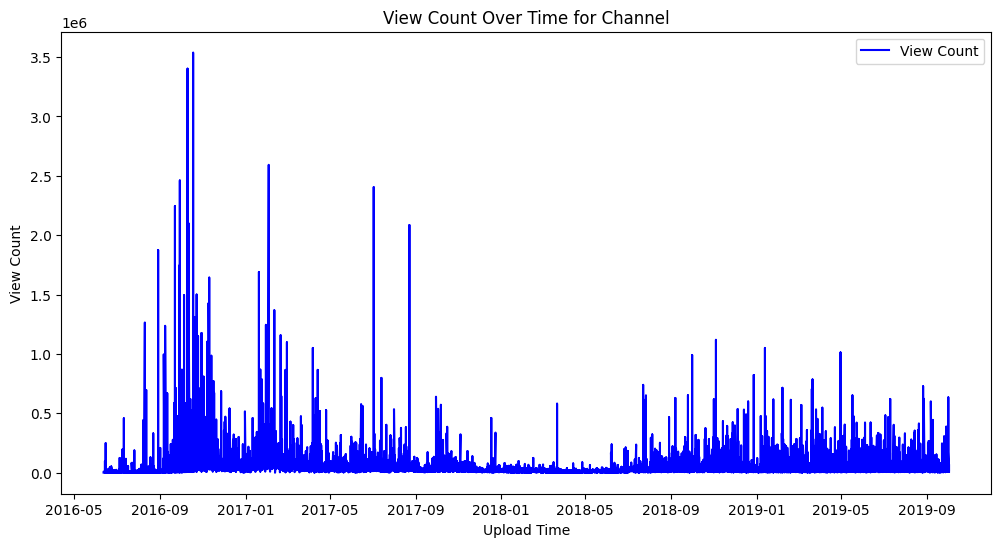

In [4]:
# 以频道为单位统计视频数量
df_trump_entertainment_videos_channel = df_trump_entertainment_videos.groupby('channel_id').size()

# 显示结果
df_trump_entertainment_videos_channel.sort_values(ascending=False)

# 假设 df_trump_entertainment_videos_channel 是你的数据框
highest_channel = df_trump_entertainment_videos.iloc[0]['channel_id']
df = df_trump_entertainment_videos[df_trump_entertainment_videos['channel_id'] == highest_channel]

# Step 1: 将 'upload_time' 列转换为 datetime 类型，并按时间排序
df['upload_date'] = pd.to_datetime(df['upload_date'])
df = df.sort_values('upload_date')

# Step 2: 将 'upload_time' 设为索引
df.set_index('upload_date', inplace=True)

# Step 3: 绘制播放量的变化曲线
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['view_count'], color='b', label='View Count')
plt.xlabel('Upload Time')
plt.ylabel('View Count')
plt.title('View Count Over Time for Channel')
plt.legend()
plt.show()


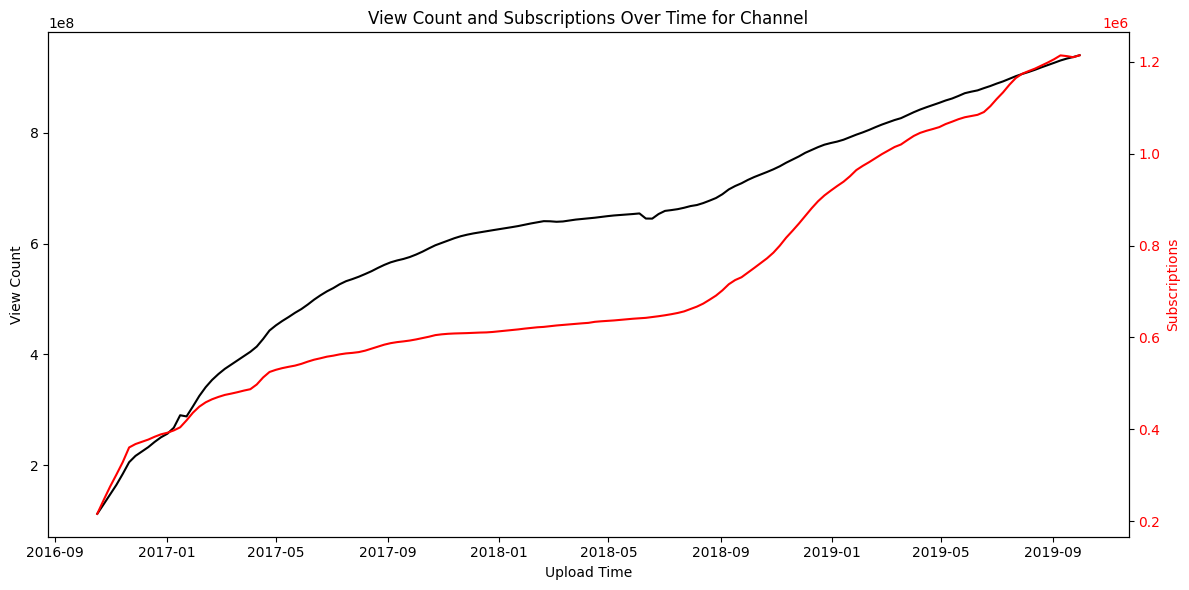

In [5]:
# 假设你的数据已准备好
df2 = df_timeseries[df_timeseries['channel'] == highest_channel]

# Step 1: 将 'datetime' 列转换为 datetime 类型，并按时间排序
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2 = df2.sort_values('datetime')

# Step 2: 将 'datetime' 设为索引
df2.set_index('datetime', inplace=True)

# Step 3: 绘制播放量和订阅数的变化曲线
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左侧 Y 轴: 播放量 (views)
ax1.plot(df2.index, df2['views'], color='black', label='View Count')
ax1.set_xlabel('Upload Time')
ax1.set_ylabel('View Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 右侧 Y 轴: 订阅数 (subs)
ax2 = ax1.twinx()
ax2.plot(df2.index, df2['subs'], color='r', label='Subscriptions')
ax2.set_ylabel('Subscriptions', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加标题和图例
plt.title('View Count and Subscriptions Over Time for Channel')
fig.tight_layout()  # 自动调整布局
plt.show()